### Load the datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import csv
import IPython
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import IPython.display
import tensorflow as tf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
           'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
           'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
           'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto']

In [4]:
# File name
#file_path = "../Data/"
file_path = '/content/drive/Othercomputers/Laptop/homework3/Data/'

train_df = {}
val_df = {}

# Load data
for reg in regions:

  train_df[reg] = pd.read_csv(file_path + 'Train/' + str(reg) + '.csv', 
                                   index_col='data', parse_dates=['data'])
  val_df[reg] = pd.read_csv(file_path + 'Validation/' + str(reg) + '.csv', 
                                   index_col='data', parse_dates=['data'])

# Sto usando i dati non normalizzati

Work on Lombardia

In [5]:
data_Lombardia = pd.concat([train_df['Lombardia'], val_df['Lombardia']], axis=0)

In [6]:
data_Lombardia

,totale_ospedalizzati,nuovi_positivi,dimessi_guariti,deceduti
data,,,,
2022-01-10,3245,17581,1000102,35464
2022-01-11,3458,45555,1021233,35519
2022-01-12,3570,41050,1055277,35610
2022-01-13,3709,39683,1067147,35662
2022-01-14,3731,33856,1123441,35777
...,...,...,...,...
2022-04-12,1148,11669,2430406,39500
2022-04-13,1189,8723,2436124,39515
2022-04-14,1163,8780,2444470,39540


### Difference and Percentage change

In [7]:
diff = pd.DataFrame()
pct_change = pd.DataFrame()

# Difference between series like for instance  𝑥𝑡  and  𝑥𝑡−1
diff['totale_ospedalizzati'] = data_Lombardia['totale_ospedalizzati'].diff()
diff['nuovi_positivi'] = data_Lombardia['nuovi_positivi'].diff()
diff['dimessi_guariti'] = data_Lombardia['dimessi_guariti'].diff()
diff['deceduti'] = data_Lombardia['deceduti'].diff()

# Percentage change  (𝑥𝑡−𝑥𝑡−1)/𝑥𝑡−1
pct_change['totale_ospedalizzati'] = data_Lombardia['totale_ospedalizzati'].pct_change()
pct_change['nuovi_positivi'] = data_Lombardia['nuovi_positivi'].pct_change()
pct_change['dimessi_guariti'] = data_Lombardia['dimessi_guariti'].pct_change()
pct_change['deceduti'] = data_Lombardia['deceduti'].pct_change()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1496f0990>,
      dtype=object)

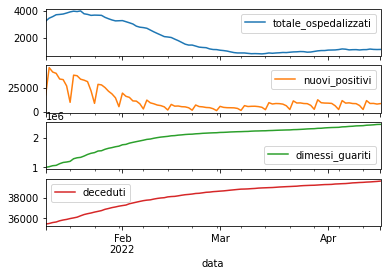

In [8]:
data_Lombardia.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd149786450>,
      dtype=object)

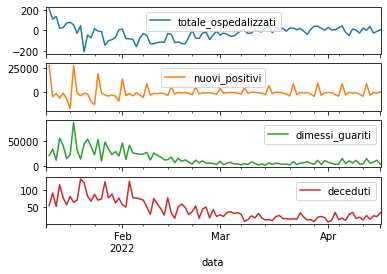

In [9]:
diff.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd148dfe050>,
      dtype=object)

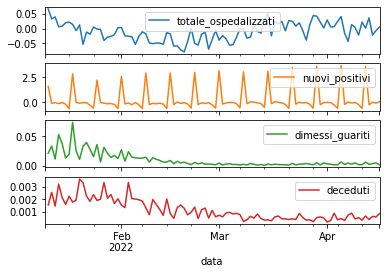

In [10]:
pct_change.plot(subplots=True)

### Autocorrelation Function

Autocorrelation measures how a series is correlated with a lagged copy of itself. For a lag  𝑘 , it is computed as, 
$$
    r_k = Corr(x_t, x_{t+k})
$$
Any substantial non-zero autocorrelations implies that the series can be forecast from the past.

In [11]:
print(data_Lombardia['totale_ospedalizzati'].autocorr())
print(data_Lombardia['nuovi_positivi'].autocorr())
print(data_Lombardia['dimessi_guariti'].autocorr())
print(data_Lombardia['deceduti'].autocorr())

0.9983012920848309
0.8143707862335126
0.9996287896463467
0.9998871820041028


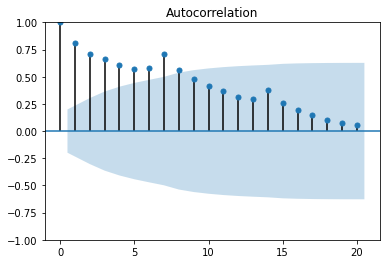

In [12]:
plot_acf(data_Lombardia['nuovi_positivi'],lags=20)
plt.show()

* the ACF for lag 0 ($r_0$) is always 1 since it measures the correlation of the serie with itself
* the X axis reports the lag value $k$
* the blue area reports the approximate 95% confidence interval

The plot identifies a non-stationary series.
We want to make it stationary

### Stationary Series

Stationary time series have the statistical properties (such as mean, variance, autocorrelation, etc.) all constant over time. Series with a zero trend, constant variance, and constant autocorrelation is stationary (or strong stationary, meaning that the entire distribution of data is time-invariant). We have weak stationarity when mean, variance and autocorrelation are time-invariant.

Autocorrelation is time-invariant when $Corr(x_t, x_{t+k})$ is only a function of $k$.

In [13]:
print(adfuller(data_Lombardia['totale_ospedalizzati'])[1])
print(adfuller(data_Lombardia['nuovi_positivi'])[1])
print(adfuller(data_Lombardia['dimessi_guariti'])[1])
print(adfuller(data_Lombardia['deceduti'])[1])

0.011799826341189746
4.2988507825261304e-11
0.9613717261308627
0.0059994201489501344


Unless dimessi guariti, they seems stationary

In [14]:
print(adfuller(pct_change['totale_ospedalizzati'].dropna())[1])
print(adfuller(pct_change['nuovi_positivi'].dropna())[1])
print(adfuller(pct_change['dimessi_guariti'].dropna())[1])
print(adfuller(pct_change['deceduti'].dropna())[1])

0.511078971934083
0.07746997134136988
0.00034466806248314964
0.695017379119224


In [15]:
print(adfuller(diff['totale_ospedalizzati'].dropna())[1])
print(adfuller(diff['nuovi_positivi'].dropna())[1])
print(adfuller(diff['dimessi_guariti'].dropna())[1])
print(adfuller(diff['deceduti'].dropna())[1])

0.29105736396497517
0.3635088400639237
0.0034898738958826325
0.7389083926353917


We can use the initial data for 'totale_ospedalizzati', 'nuovi_positivi', 'deceduti', and the percentage change for 'dimessi_guariti'

In [16]:
data_Lombardia['pct_change_dimessi_guariti'] = data_Lombardia['dimessi_guariti'].pct_change()
data_Lombardia['diff_dimessi_guariti'] = data_Lombardia['dimessi_guariti'].diff()

## Automatic Search of the Model Parameters

Instead of searching for the model parameter ourselves, we can use the function auto_arima from the pmdarima library that can automatically discover the optimal order for an ARIMA model.

In [17]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
features = ['totale_ospedalizzati', 'nuovi_positivi', 'diff_dimessi_guariti', 'pct_change_dimessi_guariti', 'deceduti']
results = pm.auto_arima(data_Lombardia[features[2]].dropna())

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -999.978
Date:                Thu, 21 Apr 2022   AIC                           2011.956
Time:                        07:12:51   BIC                           2027.279
Sample:                             0   HQIC                          2018.147
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    126.7569    405.616      0.313      0.755    -668.235     921.749
ar.L1          0.0031      0.086      0.036      0.971      -0.165       0.171
ar.L2         -0.3800      0.068     -5.624      0.000      -0.512      -0.248
ma.L1         -1.3285      0.076    -17.569      0.000      -1.477      -1.180
ma.L2          0.7698      0.078      9.836      0.000       0.616       0.923
sigma2      7.079e+07      0.007   1.03e+10      0.000    7.08e+07    7.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               133.07
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.69e+25. Standard errors may be unstable.
"""

# Nuovi positivi

In [ ]:
# SARIMAX(2, 1, 1)	

nuovi_positivi_model = SARIMAX(data_Lombardia['nuovi_positivi'], order=(2,1,1))
nuovi_positivi_results = nuovi_positivi_model.fit()

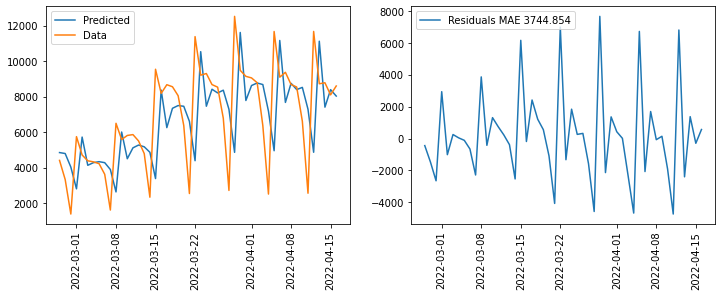

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(nuovi_positivi_results.predict()[-50:], label="Predicted")
plt.plot(data_Lombardia['nuovi_positivi'][-50:], label="Data")
plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
plt.plot(nuovi_positivi_results.resid[-50:], label="Residuals MAE %.3f"%nuovi_positivi_results.mae)
plt.xticks(rotation=90)
plt.legend()

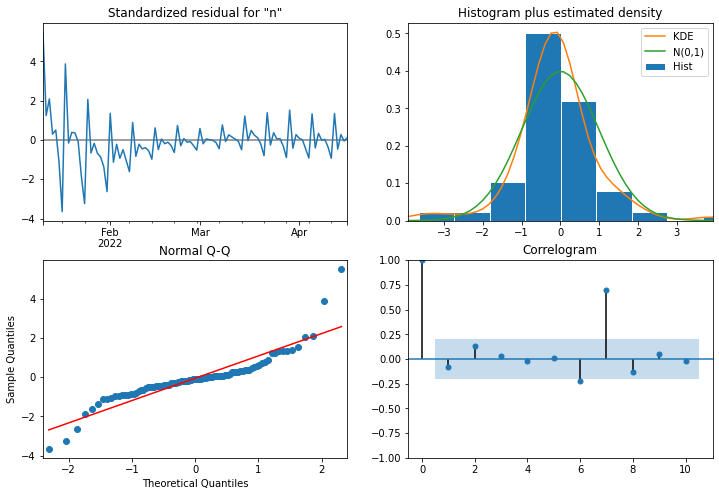

In [ ]:
g1 = nuovi_positivi_results.plot_diagnostics(figsize=(12,8))

#Totale ospedalizzati

In [ ]:
# SARIMAX(0, 2, 1)	

totale_ospedalizzati_model = SARIMAX(data_Lombardia['totale_ospedalizzati'], order=(0,2,1))
totale_ospedalizzati_results = totale_ospedalizzati_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


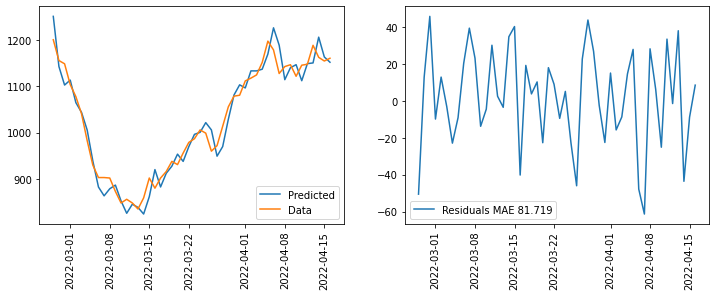

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(totale_ospedalizzati_results.predict()[-50:], label="Predicted")
plt.plot(data_Lombardia['totale_ospedalizzati'][-50:], label="Data")
plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
plt.plot(totale_ospedalizzati_results.resid[-50:], label="Residuals MAE %.3f"%totale_ospedalizzati_results.mae)
plt.xticks(rotation=90)
plt.legend()

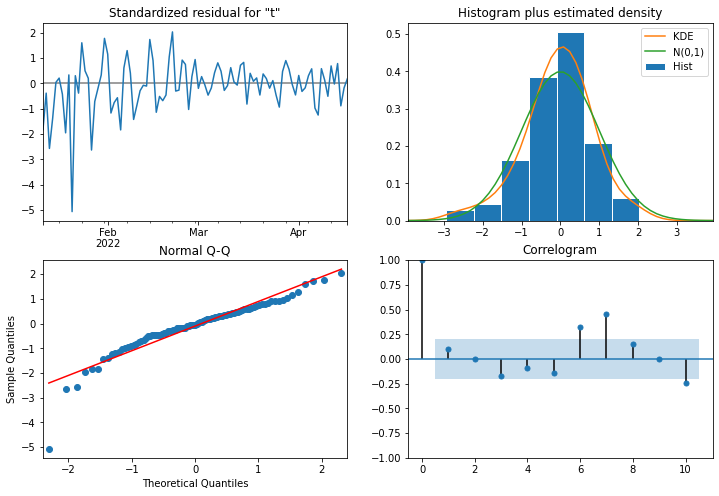

In [ ]:
g0 = totale_ospedalizzati_results.plot_diagnostics(figsize=(12,8))

# PCT change Dimessi Guariti

In [ ]:
# 	SARIMAX(4, 1, 5)	

pct_change_dimessi_guariti_model = SARIMAX(data_Lombardia['pct_change_dimessi_guariti'], order=(4,1,5))
pct_change_dimessi_guariti_results = pct_change_dimessi_guariti_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


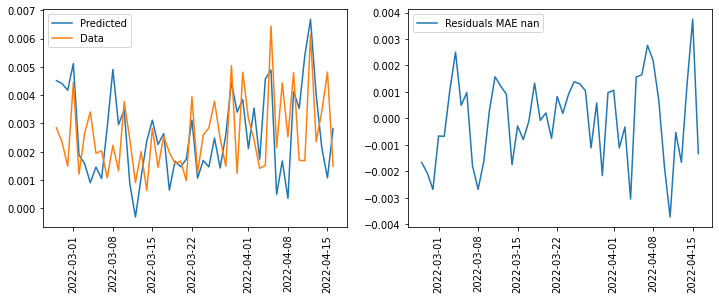

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(pct_change_dimessi_guariti_results.predict()[-50:], label="Predicted")
plt.plot(data_Lombardia['pct_change_dimessi_guariti'][-50:], label="Data")
plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
plt.plot(pct_change_dimessi_guariti_results.resid[-50:], label="Residuals MAE %.3f"%pct_change_dimessi_guariti_results.mae)
plt.xticks(rotation=90)
plt.legend()

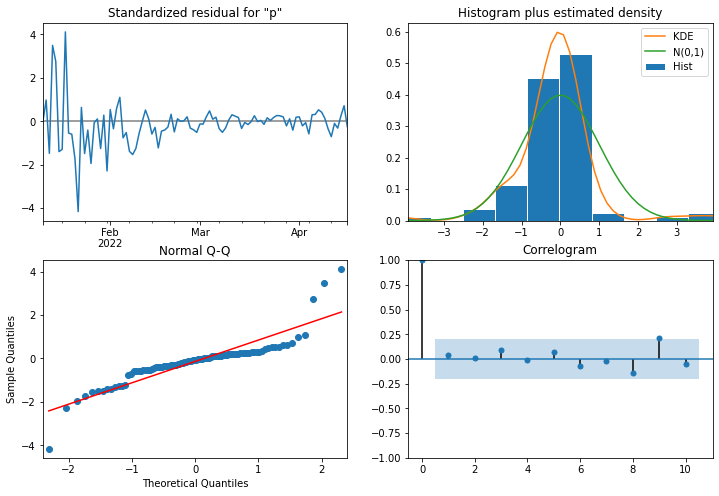

In [ ]:
g2 = pct_change_dimessi_guariti_results.plot_diagnostics(figsize=(12,8))

# Diff Dimessi Guariti

In [21]:
# SARIMAX(2, 1, 2)		

diff_dimessi_guariti_model = SARIMAX(data_Lombardia['diff_dimessi_guariti'], order=(2,1,2))
diff_dimessi_guariti_results = diff_dimessi_guariti_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


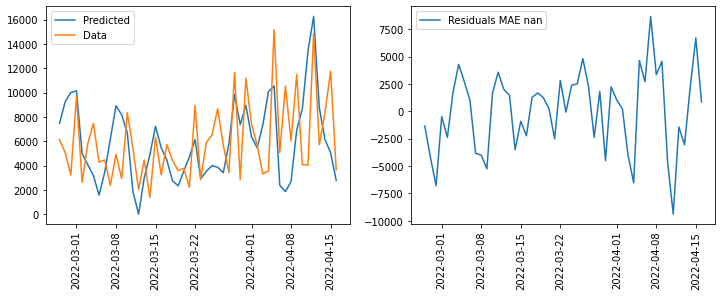

In [22]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(diff_dimessi_guariti_results.predict()[-50:], label="Predicted")
plt.plot(data_Lombardia['diff_dimessi_guariti'][-50:], label="Data")
plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
plt.plot(diff_dimessi_guariti_results.resid[-50:], label="Residuals MAE %.3f"%diff_dimessi_guariti_results.mae)
plt.xticks(rotation=90)
plt.legend()

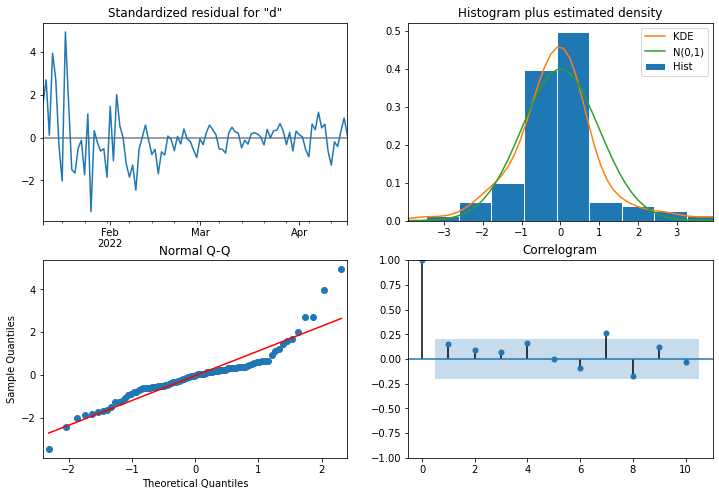

In [23]:
g4 = diff_dimessi_guariti_results.plot_diagnostics(figsize=(12,8))

# Deceduti

In [ ]:
# SARIMAX(1, 2, 3)		

deceduti_model = SARIMAX(data_Lombardia['deceduti'], order=(1,2,3))
deceduti_results = deceduti_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


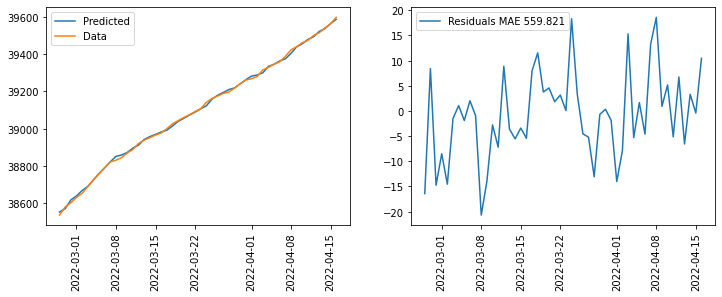

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(deceduti_results.predict()[-50:], label="Predicted")
plt.plot(data_Lombardia['deceduti'][-50:], label="Data")
plt.xticks(rotation=90)
plt.legend()
plt.subplot(1,2,2)
plt.plot(deceduti_results.resid[-50:], label="Residuals MAE %.3f"%deceduti_results.mae)
plt.xticks(rotation=90)
plt.legend()

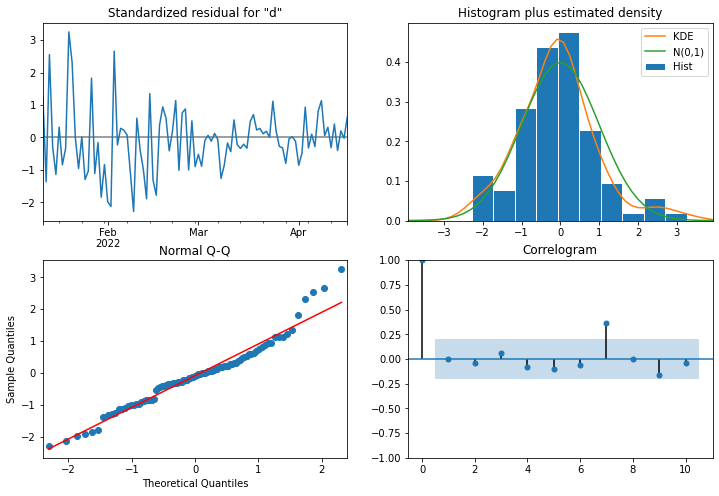

In [ ]:
g2 = deceduti_results.plot_diagnostics(figsize=(12,8))